In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_scores = pd.read_csv('/content/scores_data.csv')
df_scores.columns = df_scores.columns.str.strip()
df_scores['Score'] = df_scores['Score'].str.split('/').str[0].astype(int)

In [ ]:
batch_stats = df_scores.groupby('Batch')['Score'].agg(['mean', 'median', 'std', 'count', 'min', 'max']).reset_index()
print(batch_stats)

        Batch      mean  median       std  count  min  max
0  AI_ELITE_4  3.791667     4.0  1.443376     48    0    7
1  AI_ELITE_6  4.229167     4.0  1.640441     48    0    7
2  AI_ELITE_7  5.056604     5.0  1.446682     53    2    7


/tmp/ipython-input-3685217076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Batch', y='mean', data=batch_stats, palette='viridis')


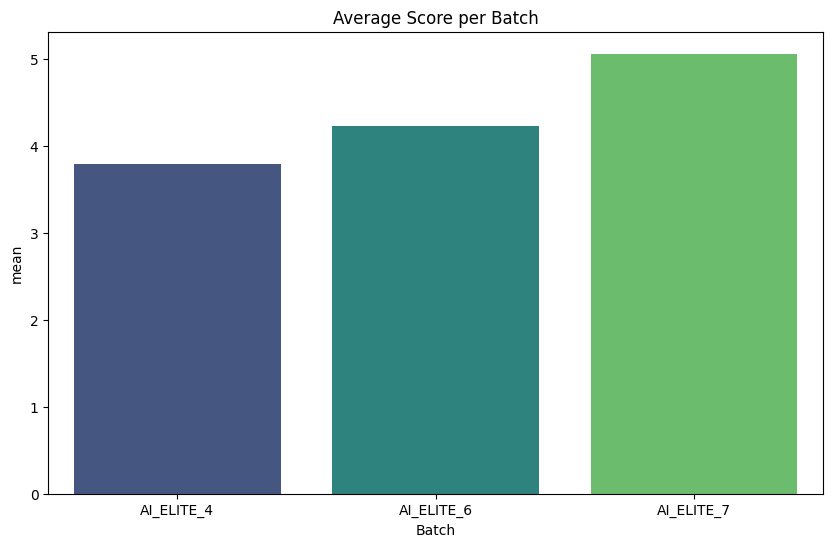

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Batch', y='mean', data=batch_stats, palette='viridis')
plt.title('Average Score per Batch')
plt.savefig('avg_score_per_batch.png')

/tmp/ipython-input-1171427884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Batch', y='Score', data=df_scores, palette='Set2')


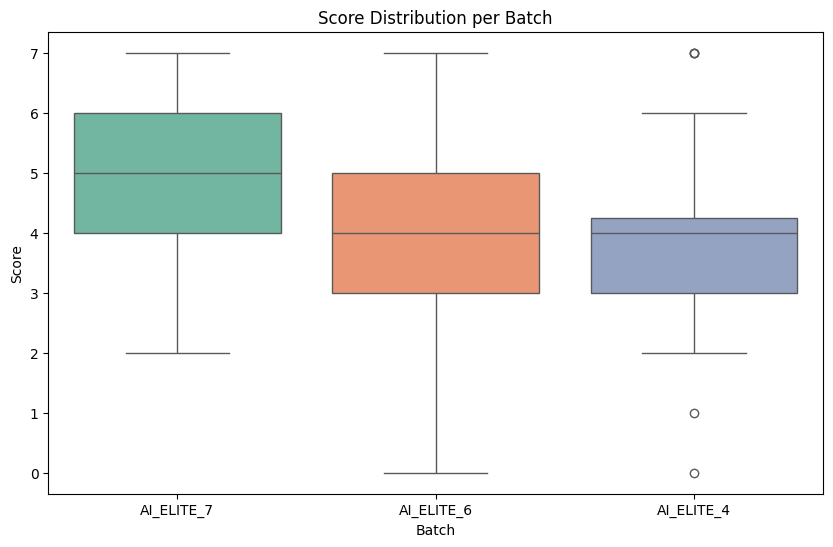

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Batch', y='Score', data=df_scores, palette='Set2')
plt.title('Score Distribution per Batch')
plt.savefig('score_distribution_boxplot.png')

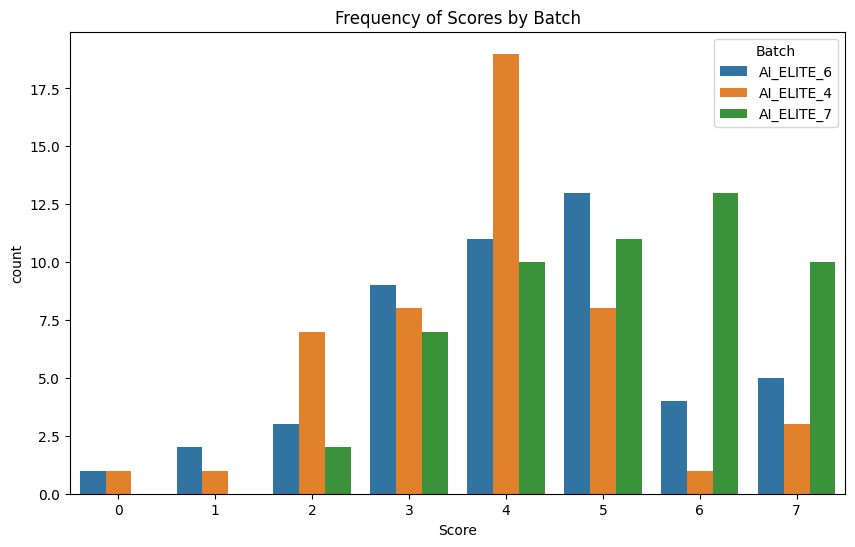

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', hue='Batch', data=df_scores)
plt.title('Frequency of Scores by Batch')
plt.savefig('score_frequency_by_batch.png')

In [ ]:
df_scores['High_Scorer'] = df_scores['Score'] >= 6
df_scores['Low_Scorer'] = df_scores['Score'] <= 2
performance_insights = df_scores.groupby('Batch').agg({
    'High_Scorer': lambda x: (x.sum() / len(x)) * 100,
    'Low_Scorer': lambda x: (x.sum() / len(x)) * 100
}).reset_index()
print(performance_insights)
performance_insights.to_csv('batch_performance_insights.csv', index=False)

        Batch  High_Scorer  Low_Scorer
0  AI_ELITE_4     8.333333   18.750000
1  AI_ELITE_6    18.750000   12.500000
2  AI_ELITE_7    43.396226    3.773585


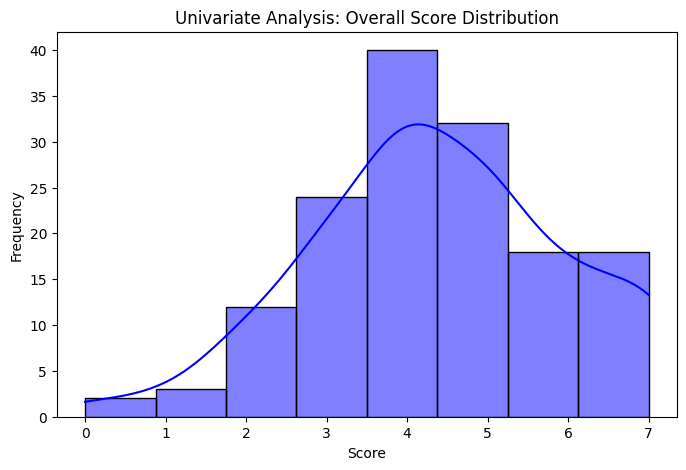

In [ ]:
# 1. Univariate Analysis: Score Distribution (Entire Population)
plt.figure(figsize=(8, 5))
sns.histplot(df_scores['Score'], bins=8, kde=True, color='blue')
plt.title('Univariate Analysis: Overall Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('univariate_score_dist.png')

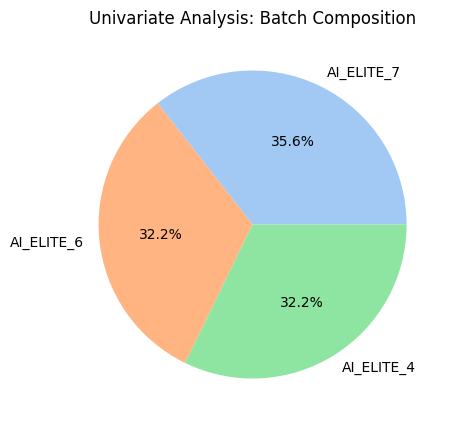

In [ ]:
# 2. Univariate Analysis: Batch Distribution (Pie Chart)
plt.figure(figsize=(8, 5))
df_scores['Batch'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Univariate Analysis: Batch Composition')
plt.ylabel('')
plt.savefig('univariate_batch_comp.png')

/tmp/ipython-input-1948523531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Batch', y='Score', data=df_scores, palette='muted', inner='quartile')


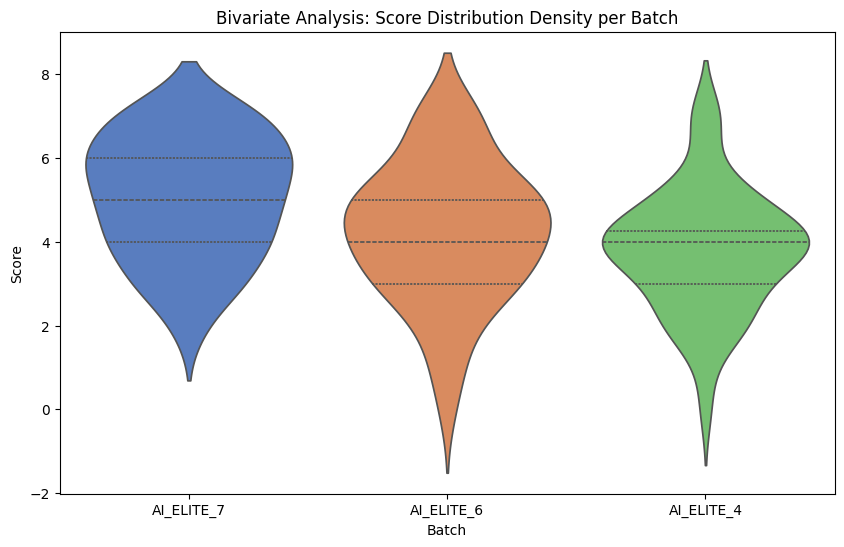

In [ ]:
# 3. Bivariate Analysis: Score by Batch (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Batch', y='Score', data=df_scores, palette='muted', inner='quartile')
plt.title('Bivariate Analysis: Score Distribution Density per Batch')
plt.savefig('bivariate_violin_score_batch.png')

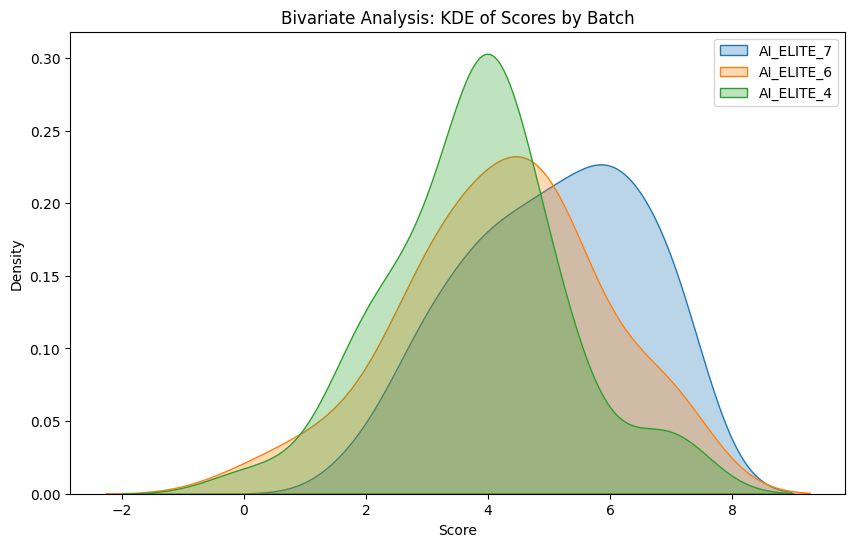

In [ ]:
# 4. Bivariate Analysis: KDE Plot (Density Overlap)
plt.figure(figsize=(10, 6))
for batch in df_scores['Batch'].unique():
    sns.kdeplot(df_scores[df_scores['Batch'] == batch]['Score'], label=batch, fill=True, alpha=0.3)
plt.title('Bivariate Analysis: KDE of Scores by Batch')
plt.xlabel('Score')
plt.legend()
plt.savefig('bivariate_kde_score_batch.png')

# Batch-wise Performance Analysis Report  

## 1. Executive Summary of Performance

| Batch | Mean Score | Median Score | Std. Deviation | Total Students | Min Score | Max Score |
|------|-----------|-------------|---------------|---------------|-----------|-----------|
| **AI_ELITE_4** | 3.79 | 4.0 | 1.44 | 48 | 0 | 7 |
| **AI_ELITE_6** | 4.23 | 4.0 | 1.64 | 48 | 0 | 7 |
| **AI_ELITE_7** | 5.06 | 5.0 | 1.45 | 53 | 2 | 7 |

## 2. Key Insights

### A. Batch AI_ELITE_7 — The Top Performers

- **Performance:**  
  This batch leads with the highest average score of **5.06 / 7**.

- **High Scorers:**  
  Approximately **43.4%** of students scored **6 or 7**, more than double the high-scorer rate of AI_ELITE_6.  
  This indicates a strong mastery of concepts across a large portion of the batch.

- **Consistency:**  
  The minimum score is **2**, indicating that even the lowest-performing students outperform the weakest students in other batches (min = 0).

Overall, AI_ELITE_7 demonstrates both high achievement and consistency.

### B. Batch AI_ELITE_6 — High Variance Group

- **Performance:**  
  Mid-range performance with an average score of **4.23**.

- **Diversity in Learning Levels:**  
  Highest standard deviation (**1.64**), suggesting a wide gap between strong and weak performers.

- **Score Spread:**  
  - **18.8%** scored very high  
  - **12.5%** scored **2 or below**

- **Potential:**  
  While top students perform well, a sizable portion may require additional academic support.

This batch needs targeted intervention rather than uniform teaching.

### C. Batch AI_ELITE_4 — The Struggling Batch

- **Performance:**  
  Lowest average score at **3.79**.

- **Low Scorers:**  
  Nearly **19%** of students scored **2 or less**, the highest low-score rate among all batches.

- **High Achievers:**  
  Only **8.3%** managed to score **6 or 7**.

- **Challenge Identified:**  
  The pace or difficulty of the material may be overwhelming for this group.

AI_ELITE_4 shows clear signs of foundational gaps.

## 3. Comparative Visualization Insights

### Average Scores
- The bar chart **`avg_score_per_batch.png`** shows a steady upward trend from AI_ELITE_4 to AI_ELITE_7.

### Score Distribution
- The boxplot **`score_distribution_boxplot.png`** highlights:
  - Median score of **5.0** for AI_ELITE_7  
  - Median score of **4.0** for AI_ELITE_4 and AI_ELITE_6
- The entire distribution of AI_ELITE_7 is shifted higher.

### Score Frequency
- The frequency plot **`score_frequency_by_batch.png`** shows:
  - AI_ELITE_7 peaks at score **7**
  - AI_ELITE_4 peaks around **3**
  - AI_ELITE_6 peaks around **4**



## 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis (Individual Variable Study)

**Focus:**  
- Understanding the distribution of `Score`  
- Evaluating the balance of the `Batch` variable  

**Score Distribution**
- The histogram illustrates whether the test difficulty was appropriate.
- A peak at mid-to-high scores suggests the test was not overly difficult.
- The score spread indicates effective differentiation between student performance levels.

**Batch Balance**
- The pie chart shows that batches are nearly equal in size (approximately 32%–35% each).
- This balance ensures that comparisons across batches are statistically fair and reliable.

### 4.2 Bivariate Analysis (Relationship Study)

**Focus:**  
- Examining how the `Batch` variable impacts `Score`.

**Violin Plots**
- Violin plots extend boxplots by visualizing score density.
- **AI_ELITE_7** shows maximum density at scores **6–7**, indicating a strong concentration of high performers.
- **AI_ELITE_4** is denser in the middle and lower score ranges, reflecting weaker overall performance.

**KDE (Kernel Density Estimate) Plots**
- **AI_ELITE_7** exhibits a right-shifted peak, confirming high performance.
- **AI_ELITE_6** displays a flatter, wider curve, indicating high variance in student outcomes.
- **AI_ELITE_4** has a left-shifted peak, signaling a lower central tendency.

## 5. Student Performance Recommendations

The analysis indicates that performance differences across batches are driven not only by average scores, but by the **shape and spread of learning distributions** within each batch.

### AI_ELITE_7 (The High-Density Group)

This batch shows a strong concentration of students scoring **6 and 7**, indicating high mastery of the current curriculum.

**Challenge High Performers**
- The clustering at the top suggests that the existing material may be insufficiently challenging.
- Introduce **advanced elective modules** or **honors-level projects** to sustain engagement and promote deeper learning.

**Peer Mentoring**
- Leverage high-performing students as **peer mentors** for learners in other batches.
- This reinforces the mentors’ own understanding while supporting students with foundational gaps.

### AI_ELITE_6 (The High-Variance Group)

This batch exhibits a **polarized performance distribution**, with students concentrated at both high and low score ranges.

**Bifurcated Teaching Strategy**
- Avoid a uniform, middle-paced teaching approach.
- Design **parallel learning tracks** that address differing student readiness levels.

**Targeted Remediation**
- Identify the **12.5% of students scoring below 2** and enroll them in **mandatory foundation bridge classes**.
- Allow the **top-performing 18%** to progress to advanced problem sets or enrichment activities.

### AI_ELITE_4 (The Left-Shifted Group)

The score distribution for this batch is shifted toward the lower end, indicating systemic challenges rather than isolated underperformance.

**Curriculum Review**
- The consistently lower scores suggest that the **pace of instruction may be too fast**.
- Slow the introduction of new concepts and reinforce prerequisites before advancing.

**Frequent Low-Stakes Assessment**
- Implement **daily or weekly low-stakes quizzes** to continuously assess understanding.
- Early detection of learning gaps allows instructors to intervene before deficiencies accumulate into poor final outcomes.

Overall, these recommendations align instructional strategies with the **observed learning patterns** of each batch, enabling more effective, equitable, and data-driven educational interventions.


## Conclusion

- **AI_ELITE_7** is excelling and ready for advancement  
- **AI_ELITE_6** has strong potential but needs focused support  
- **AI_ELITE_4** requires immediate academic reinforcement  

Strategic, batch-specific interventions will significantly improve overall learning outcomes.
